# Pima Indians Diabetes Data Set数据探索

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 
- 0列为pregnants(怀孕次数)；
- 1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)；
- 2列为blood_pressure(舒张压,单位:mm Hg）
- 3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm）
- 4列为serum_insulin(餐后血清胰岛素,单位:mm）
- 5列为BMI,体重指数（体重（公斤）/ 身高（米）^2）
- 6列为Diabetes_pedigree_function(糖尿病家系作用)
- 7列为Age(年龄)
- 8列为Target(分类变量,0或1）
 
数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:)
https://www.kaggle.com/c/pf2012-diabetes

## 1. import 工具包

In [139]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. 读取数据

In [140]:
train = pd.read_csv("pima-indians-diabetes.csv", encoding='gbk')
train.head()

pregnants  Plasma_glucose_concentration  blood_pressure  \
0          6                           148              72   
1          1                            85              66   
2          8                           183              64   
3          1                            89              66   
4          0                           137              40   

   Triceps_skin_fold_thickness  serum_insulin   BMI  \
0                           35              0  33.6   
1                           29              0  26.6   
2                            0              0  23.3   
3                           23             94  28.1   
4                           35            168  43.1   

   Diabetes_pedigree_function  Age  Target  
0                       0.627   50       1  
1                       0.351   31       0  
2                       0.672   32       1  
3                       0.167   21       0  
4                       2.288   33       1

检查数据规模
读取测试数据

In [141]:
print("Train :", train.shape)

Train : (768, 9)


In [142]:
#查看数据基本信息
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [143]:
#查看数值型特征的基本统计量
train.describe()

pregnants  Plasma_glucose_concentration  blood_pressure  \
count  768.000000                    768.000000      768.000000   
mean     3.845052                    120.894531       69.105469   
std      3.369578                     31.972618       19.355807   
min      0.000000                      0.000000        0.000000   
25%      1.000000                     99.000000       62.000000   
50%      3.000000                    117.000000       72.000000   
75%      6.000000                    140.250000       80.000000   
max     17.000000                    199.000000      122.000000   

       Triceps_skin_fold_thickness  serum_insulin         BMI  \
count                   768.000000     768.000000  768.000000   
mean                     20.536458      79.799479   31.992578   
std                      15.952218     115.244002    7.884160   
min                       0.000000       0.000000    0.000000   
25%                       0.000000       0.000000   27.300000   
50%                      23.000000      30.500000   32.000000   
75%                      32.000000     127.250000   36.600000   
max                      99.000000     846.000000   67.100000   

       Diabetes_pedigree_function         Age      Target  
count                  768.000000  768.000000  768.000000  
mean                     0.471876   33.240885    0.348958  
std                      0.331329   11.760232    0.476951  
min                      0.078000   21.000000    0.000000  
25%                      0.243750   24.000000    0.000000  
50%                      0.372500   29.000000    0.000000  
75%                      0.626250   41.000000    1.000000  
max                      2.420000   81.000000    1.000000

从结果中我们可以看到很多列的最小值为0。而在一些特定列代表的变量中，0值并没有意义，这就表名该值无效或为缺失值。

具体来说，下列变量的最小值为0时数据无意义：
1. 血浆葡萄糖浓度
2. 舒张压
3. 肱三头肌皮褶厚度
4. 餐后血清胰岛素
5. 体重指数

In [144]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
print((train[NaN_col_names] == 0).sum())

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64


第1、2、5列中0值较少；相比较而言，第3、4列中的0值多出数倍，接近总量的一半。

为了确保有足够的数据量来训练模型，针对不同的列需要有不同的缺失值判断策略。

## 3. 查看每个变量的分布 及其与标签之间的关系

### Target 

Text(0, 0.5, 'Number of occurrences')

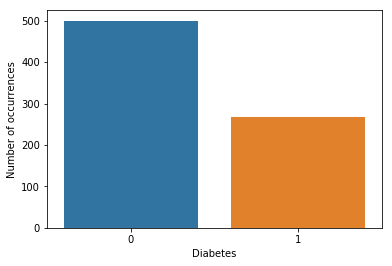

In [145]:
#该问题为分类问题，类别型特征直方图可用countplot
sns.countplot(train['Target'])
plt.xlabel('Diabetes')
plt.ylabel('Number of occurrences')

### 怀孕次数pregnants

Text(0, 0.5, 'Number of occurrences')

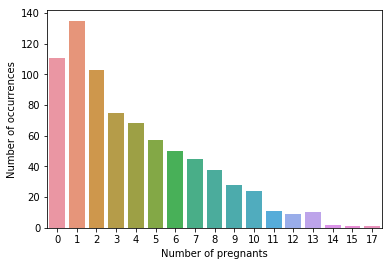

In [146]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train['pregnants'])
plt.xlabel('Number of pregnants')
plt.ylabel('Number of occurrences')


#怀孕次数有超过17的？
#但在疾病判断案例中，异常值可能就意味着得病，不能删除
ulimit = 10

#删除怀孕次数大于10的样本
train = train[train['pregnants'] < ulimit]
print (train.shape)

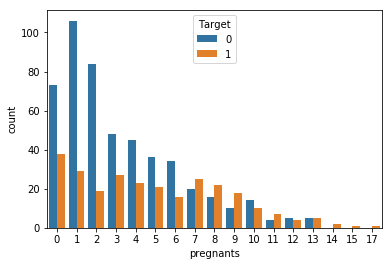

In [147]:
sns.countplot(x="pregnants", hue="Target",data=train)

怀孕次数和是否得病好像还真有关系！！！

### Plasma_glucose_concentration
血浆葡萄糖浓度

Text(0, 0.5, 'Number of occurrences')

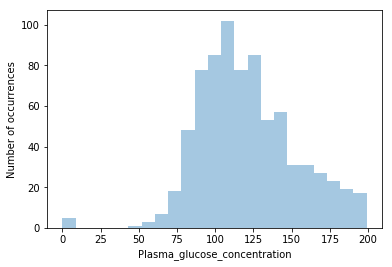

In [148]:
fig = plt.figure()
sns.distplot(train.Plasma_glucose_concentration, kde = False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of occurrences')

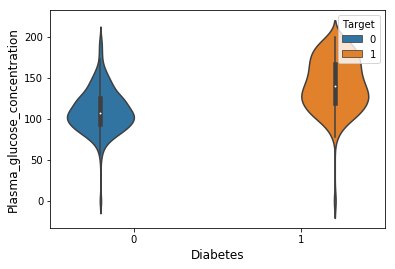

In [149]:
sns.violinplot(x='Target', y='Plasma_glucose_concentration', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

### blood_pressure

Text(0, 0.5, 'frequency')

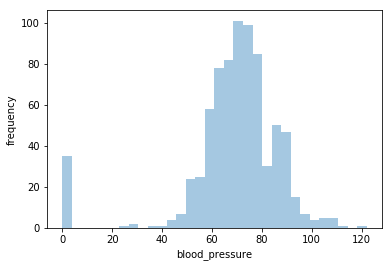

In [150]:
fig = plt.figure()
sns.distplot(train.blood_pressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')

血压为0？

查看blood_pressure与标签之间的关系

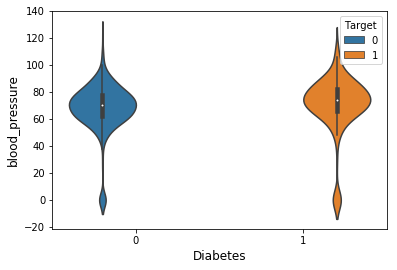

In [151]:
sns.violinplot(x='Target', y='blood_pressure', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('blood_pressure', fontsize=12)
plt.show()

### Triceps_skin_fold_thickness
三头肌皮褶厚度（单位：mm）

Text(0, 0.5, 'frequency')

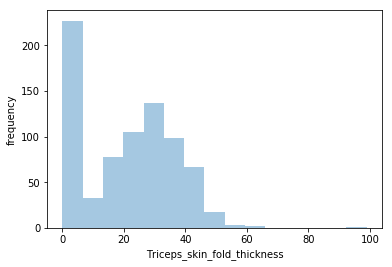

In [152]:
fig = plt.figure()
sns.distplot(train.Triceps_skin_fold_thickness, kde = False)
plt.xlabel('Triceps_skin_fold_thickness')
plt.ylabel('frequency')

Looks like there are some outliers in this feature. So let us remove them and then plot again.
但在疾病判断案例中，异常值可能就意味着得病，不能删除

ulimit = 80
train = train[train['Triceps_skin_fold_thickness'] < ulimit]

plt.scatter(range(train.shape[0]), train["Triceps_skin_fold_thickness"].values,color='purple')
plt.title("Distribution of Triceps_skin_fold_thickness")

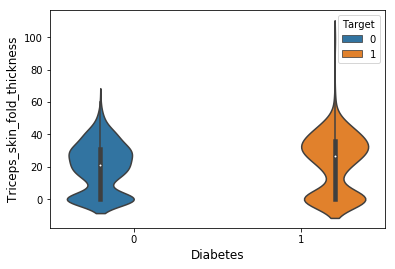

In [153]:
sns.violinplot(x='Target', y='Triceps_skin_fold_thickness', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Triceps_skin_fold_thickness', fontsize=12)
plt.show()

### serum_insulin
餐后血清胰岛素（单位:mm）

Text(0, 0.5, 'frequency')

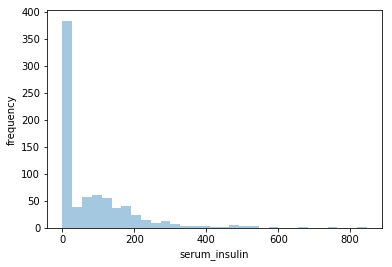

In [154]:
fig = plt.figure()
sns.distplot(train.serum_insulin, kde = False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')

serum_insulin与标签之间的关系

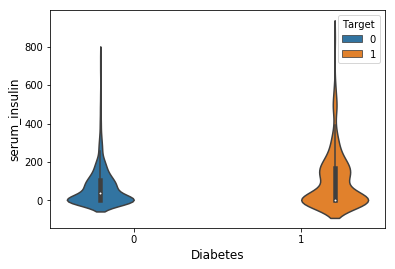

In [155]:
sns.violinplot(x='Target', y='serum_insulin', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('serum_insulin', fontsize=12)
plt.show()

### BMI
体重指数（体重（公斤）/ 身高（米）^2）

Text(0, 0.5, 'frequency')

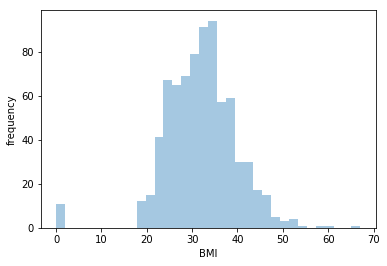

In [156]:
fig = plt.figure()
sns.distplot(train.BMI, kde = False)
plt.xlabel('BMI')
plt.ylabel('frequency')

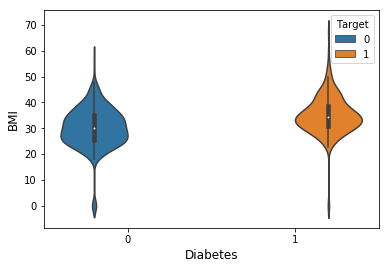

In [157]:
sns.violinplot(x='Target', y='BMI', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

BMI=0？
为缺失值

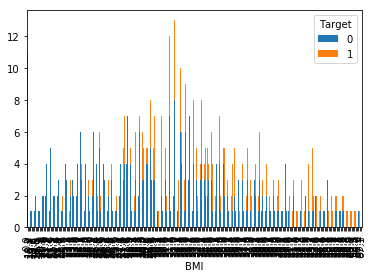

In [158]:
BMIDF = train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0)
BMIDF[[0,1]].plot(kind='bar', stacked=True)

### Diabetes_pedigree_function，糖尿病家系作用

Text(0, 0.5, 'frequency')

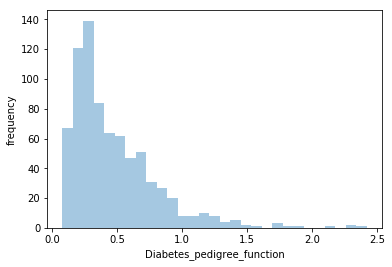

In [159]:
###Diabetes_pedigree_function，糖尿病家系作用
fig = plt.figure()
sns.distplot(train.Diabetes_pedigree_function, kde = False)
plt.xlabel('Diabetes_pedigree_function')
plt.ylabel('frequency')

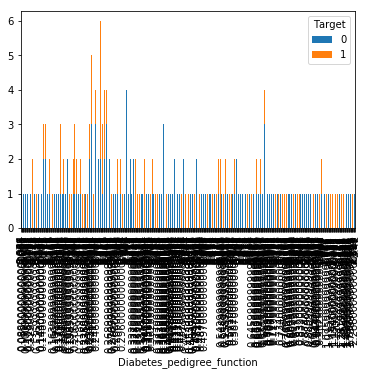

In [160]:
DF = train.groupby(['Diabetes_pedigree_function', 'Target'])['Diabetes_pedigree_function'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

### Age

Text(0, 0.5, 'frequency')

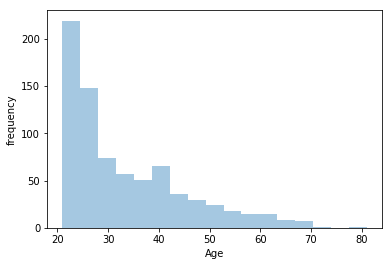

In [161]:
fig = plt.figure()
sns.distplot(train.Age, kde = False)
plt.xlabel('Age')
plt.ylabel('frequency')

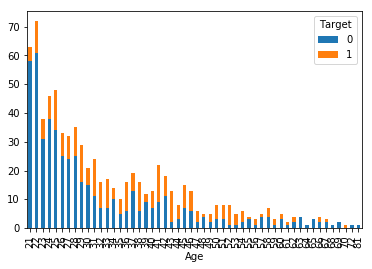

In [162]:
DF = train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

## 特征之间的相关性

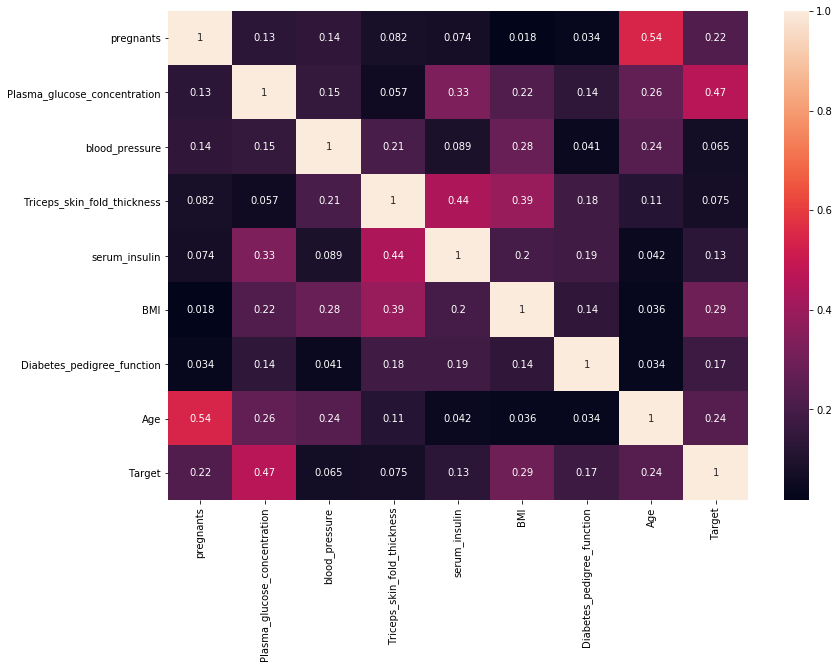

In [163]:
data_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

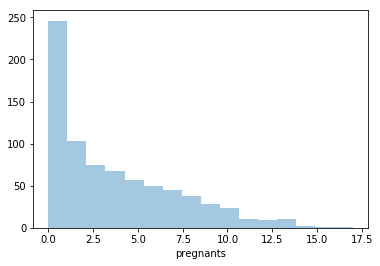

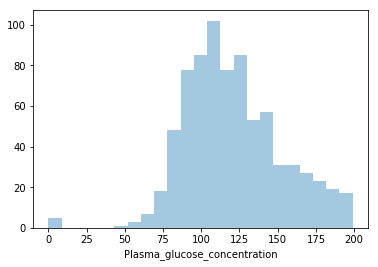

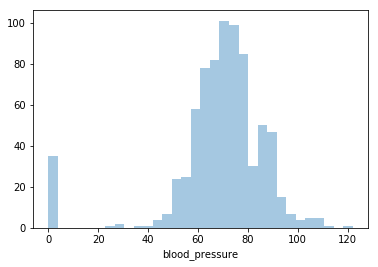

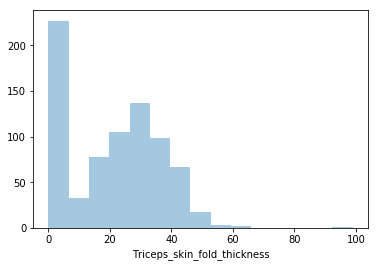

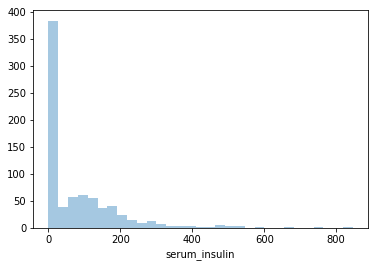

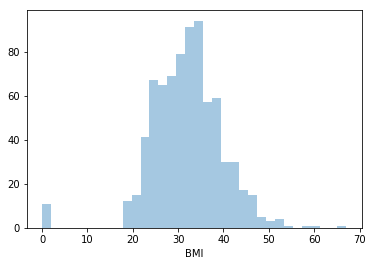

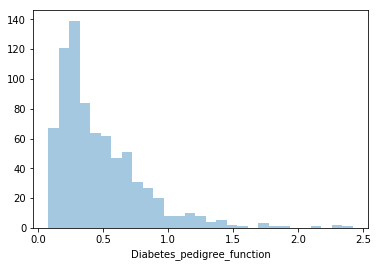

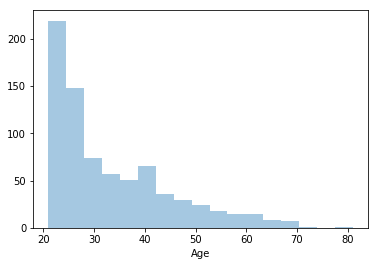

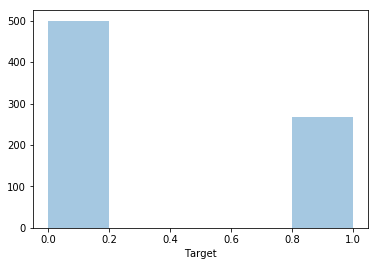

In [164]:
for feature in train.columns:
    sns.distplot(train[feature],kde = False)
    plt.show()

## 4.特征工程

### 1.准备工作
在调用一次describe看一下数据概况，准备使用std值代替以下数据的0值

In [165]:
train.describe()

pregnants  Plasma_glucose_concentration  blood_pressure  \
count  768.000000                    768.000000      768.000000   
mean     3.845052                    120.894531       69.105469   
std      3.369578                     31.972618       19.355807   
min      0.000000                      0.000000        0.000000   
25%      1.000000                     99.000000       62.000000   
50%      3.000000                    117.000000       72.000000   
75%      6.000000                    140.250000       80.000000   
max     17.000000                    199.000000      122.000000   

       Triceps_skin_fold_thickness  serum_insulin         BMI  \
count                   768.000000     768.000000  768.000000   
mean                     20.536458      79.799479   31.992578   
std                      15.952218     115.244002    7.884160   
min                       0.000000       0.000000    0.000000   
25%                       0.000000       0.000000   27.300000   
50%                      23.000000      30.500000   32.000000   
75%                      32.000000     127.250000   36.600000   
max                      99.000000     846.000000   67.100000   

       Diabetes_pedigree_function         Age      Target  
count                  768.000000  768.000000  768.000000  
mean                     0.471876   33.240885    0.348958  
std                      0.331329   11.760232    0.476951  
min                      0.078000   21.000000    0.000000  
25%                      0.243750   24.000000    0.000000  
50%                      0.372500   29.000000    0.000000  
75%                      0.626250   41.000000    1.000000  
max                      2.420000   81.000000    1.000000

以下五种数据为0无意义，需要进行进一步操作
1. 血浆葡萄糖浓度 - Plasma_glucose_concentration
2. 舒张压 - blood_pressure
3. 肱三头肌皮褶厚度 - Triceps_skin_fold_thickness
4. 餐后血清胰岛素 - serum_insulin
5. 体重指数 - BMI

In [166]:
Nan_col_names = ['Plasma_glucose_concentration', 'blood_pressure', 'Triceps_skin_fold_thickness', 'serum_insulin', 'BMI']
train[Nan_col_names] = train[Nan_col_names].replace(0, np.NaN)
print(train.isnull().sum())

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64


### 2.对缺失值较多的特征，新增一个特征，表示这个特征是否缺失

In [167]:
'''
Triceps_skin_fold_thickness缺失值较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
'''
# lambda表达式，注意区分pd.isnull()和train.isnull()的两种用法
train['Triceps_skin_fold_thickness_Missing'] = train['Triceps_skin_fold_thickness'].apply(lambda x: 1 if pd.isnull(x) else 0)
# pd_obj[list]
train[['Triceps_skin_fold_thickness', 'Triceps_skin_fold_thickness_Missing']].head()

Triceps_skin_fold_thickness  Triceps_skin_fold_thickness_Missing
0                         35.0                                    0
1                         29.0                                    0
2                          NaN                                    1
3                         23.0                                    0
4                         35.0                                    0

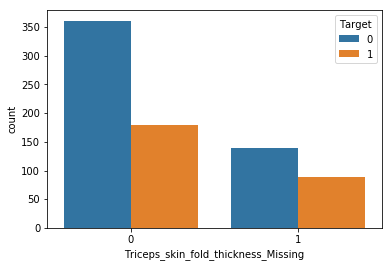

In [168]:
sns.countplot(x='Triceps_skin_fold_thickness_Missing', hue='Target', data=train)

In [169]:
'''
对serum_insulin采取同样的处理方式
'''
train['serum_insulin_Missing'] = train['serum_insulin'].apply(lambda x: 1 if pd.isnull(x) else 0)
train[['serum_insulin', 'serum_insulin_Missing']].head()

serum_insulin  serum_insulin_Missing
0            NaN                      1
1            NaN                      1
2            NaN                      1
3           94.0                      0
4          168.0                      0

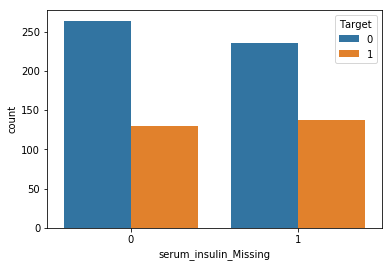

In [170]:
sns.countplot(x='serum_insulin_Missing', hue='Target', data=train)

从数据上观察，特征是否缺失好像和目标没什么关系

因为特征是否缺失好像和目标没什么关系，感觉特征缺失是随机的，所以删除新增的特征，老老实实用中值填补

In [171]:
train.drop(['serum_insulin_Missing','Triceps_skin_fold_thickness_Missing'], axis=1, inplace=True)
meds = train.median()
train.fillna(meds, inplace=True)
print(train.isnull().sum())

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64


### 3.数据标准化

In [172]:
from sklearn.preprocessing import StandardScaler

y_train = train['Target']
X_train = train.drop(['Target'], axis=1)
feat_names = X_train.columns
# 因为y本身就是{0, 1}变量不必进行标准化处理
ss_X = StandardScaler()
# 转换完成后为numpy.ndarray
X_train = ss_X.fit_transform(X_train)
# 注意index的参数
X_train = pd.DataFrame(data=X_train, columns=feat_names, index=train.index) 
X_train.head()

pregnants  Plasma_glucose_concentration  blood_pressure  \
0   0.639947                      0.866045       -0.031990   
1  -0.844885                     -1.205066       -0.528319   
2   1.233880                      2.016662       -0.693761   
3  -0.844885                     -1.073567       -0.528319   
4  -1.141852                      0.504422       -2.679076   

   Triceps_skin_fold_thickness  serum_insulin       BMI  \
0                     0.670643      -0.181541  0.166619   
1                    -0.012301      -0.181541 -0.852200   
2                    -0.012301      -0.181541 -1.332500   
3                    -0.695245      -0.540642 -0.633881   
4                     0.670643       0.316566  1.549303   

   Diabetes_pedigree_function       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496

In [173]:
#保存特征工程结果
#存为csv格式
#X_train = pd.DataFrame(data=X_train, columns=feat_names, index=train.index) 
#train = pd.concat([X_train, y_train], axis = 1)
#train.to_csv('HOME_WORK_FE_pima-indians-diabetes.csv',index = False,header=True)

## 采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。（各50分）

In [174]:
# 导入必要的工具包
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logist_r = LogisticRegression()# 默认是L2正则，C=1.0

### 1.默认参数的Logistic Regression 评分

In [180]:
loss = cross_val_score(logist_r, X_train, y_train, cv=5, scoring='neg_log_loss')
print('loss of each fold is: ',-loss)
print('cv accuracy is:', -loss.mean())

loss of each fold is:  [0.48797856 0.53011593 0.4562292  0.422546   0.48392885]
cv accuracy is: 0.47615970944434044


accuracy = cross_val_score(logist_r, X_train, y_train, cv=5, scoring='accuracy')
print('accuracy of each fold is: ',accuracy)
print('cv accuracy is:', accuracy.mean())

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 

目标函数为：J = C*sum(logloss(f(xi), yi)) + penalty

在sklearn框架下，不同学习器的参数调整步骤相同： 
1. 设置参数搜索范围
2. 生成学习器实例
3. 生成GridSearchCV的实例（参数）
4. 调用GridSearchCV的fit方法

### 2.log似然损失

In [177]:
# 1.设置参数搜索范围
penaltys = ['l1', 'l2']
Cs = [0.001,0.01,0.1,1,10,100,1000]
# 2.生成学习器实例
#logist_r = LogisticRegression()
# 3.生成GridSearchCV实例
tuned_parameters = dict(penalty=penaltys,C=Cs)
grid_log = GridSearchCV(logist_r, tuned_parameters, cv=5, scoring='neg_log_loss', n_jobs=-1)
# 4.调用GridSearchCV的fit方法
grid_log.fit(X_train, y_train)

print('log损失评估的交叉验证后的最佳得分：', -grid_log.best_score_)
print('log损失评估的最佳超参数为：', grid_log.best_params_)

log损失评估的交叉验证后的最佳得分： 0.4760289182012234
log损失评估的最佳超参数为： {'C': 1, 'penalty': 'l1'}


### 3.正确率

In [178]:
grid_accuracy = GridSearchCV(logist_r, tuned_parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_accuracy.fit(X_train, y_train)

print('正确率评估的交叉验证后的最佳得分：', grid_accuracy.best_score_)
print('正确率的最佳超参数为：', grid_accuracy.best_params_)

正确率评估的交叉验证后的最佳得分： 0.7747395833333334
正确率的最佳超参数为： {'C': 0.1, 'penalty': 'l2'}


比较来看，经过同样的折数的交叉验证后，GridSearchCV参数调整后的模型表现略优于默认参数下的模型